In [45]:
import numpy as np
import numba
from functools import partial
import matplotlib.pyplot as plt 
from IPython.display import HTML
plt.rc('font', size=14) # makes the fonts used in graphs a bit larger (and clearer)!

In [124]:
@numba.jit(nopython=True)
def force_lan(q):
    #F =  - q**2/2 + q**4/4 ######
    F = -(-q + q**3)
    return F

# define the A,B,O step function
@numba.jit(nopython=True)
def A_step( qp , h):
    q,p = qp 
    q = q + h*p
    return [q, p]

@numba.jit(nopython=True)
def B_step( qp, h) :
    q,p = qp
    F = force_lan(q)
    p = p + h*F
    return [q, p]

@numba.jit(nopython=True)
def O_step( qp, h, gamma, beta ):
    q,p = qp
    alpha = np.exp(-h*gamma)
    R = np.random.random()
    p = p * alpha + np.sqrt((1-alpha*alpha)/beta) * R
    return [q,p]


In [125]:
# implement the BAOAB method
@numba.jit(nopython=True)
def ld_BAOAB(q, p, h, gamma, beta,):
    
    qp = [q, p]
    qp_B = B_step(qp, h/2)
    qp_BA = A_step(qp_B, h/2)
    qp_BAO = O_step(qp_BA, h, gamma, beta)
    qp_BAOA = A_step(qp_BAO, h/2)
    qp_BAOAB = B_step(qp_BAOA, h/2)
    q,p = qp_BAOAB
    return q, p


In [126]:
ld_BAOAB(1.,1.,.1,1.,1.)

(1.1162779552510846, 1.3118246178947153)

In [127]:
@numba.jit(nopython=True)
def run_simulation(q0, p0, Nsteps, h, gamma, beta):
    q_traj = [q0]
    p_traj = [p0]
    t_traj = [0]

    q = q0
    p = p0
    t = 0
    
    for n in range(Nsteps):
        q,p = ld_BAOAB(q, p, h, gamma, beta)
        t = t + h
        
        q_traj += [q]
        p_traj += [p]
        t_traj += [t]
        
    q_traj = np.array(q_traj)
    p_traj = np.array(p_traj)
    t_traj = np.array(t_traj)
    
    return q_traj, p_traj, t_traj


In [128]:


# @numba.jit(nopython=True)
# def init_toplot(gamma):

#     q0 = np.random.random()
#     p0 = np.random.random()

#     Nsteps = 1000000
#     h = 0.1
#     beta = 1.0

#     # Run one long trajectory of Nsteps, using the BAOAB scheme
#     q_traj, p_traj, t_traj = run_simulation(q0, p0, Nsteps , h, gamma, beta)
    
#     return q_traj, p_traj, t_traj

In [129]:
# q_traj, p_traj, t_traj = init_toplot(0.1)

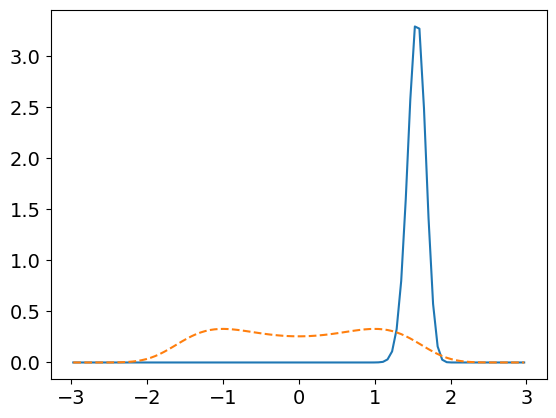

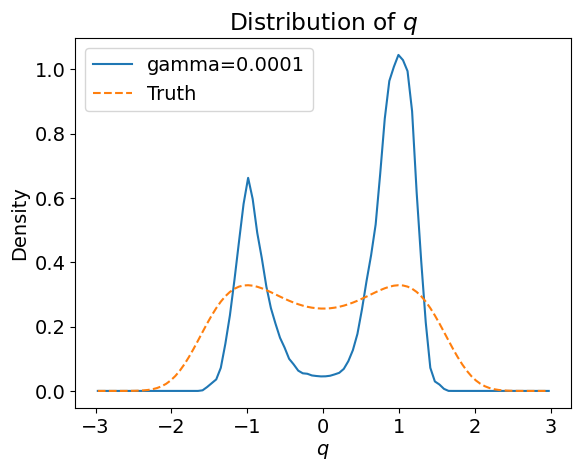

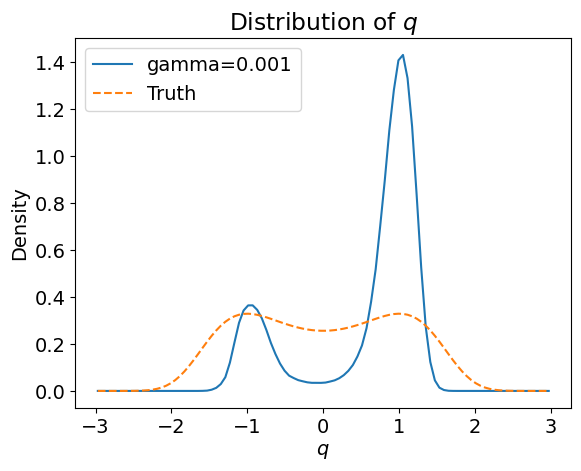

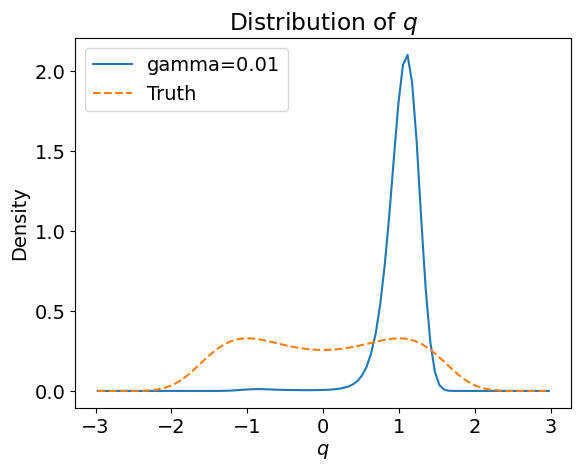

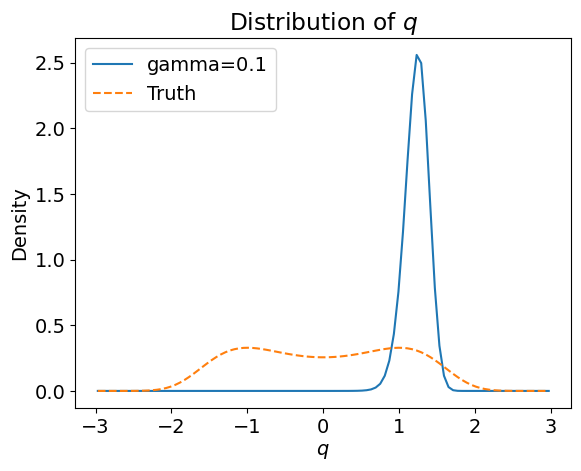

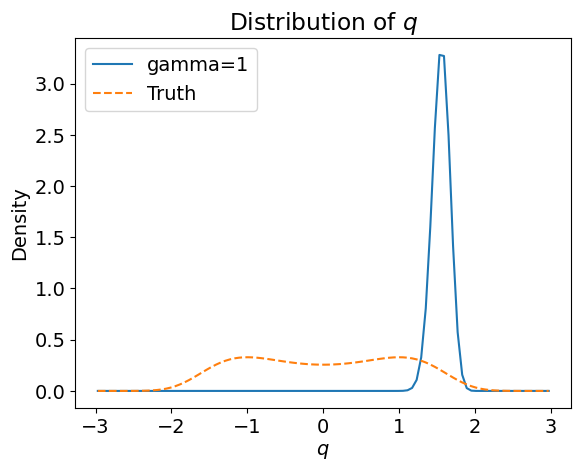

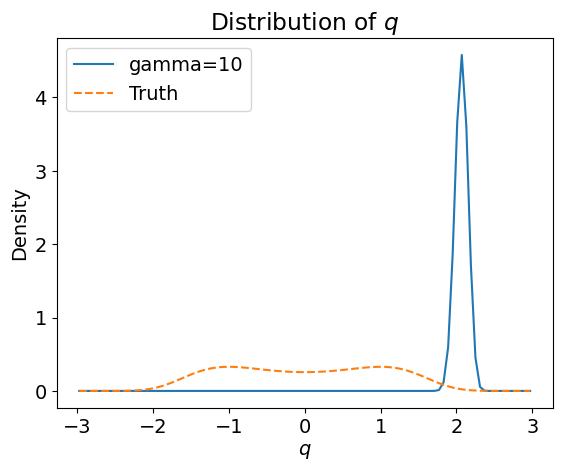

In [136]:
#plt.subplot(1,3,2) 

Nsteps = 10000000
h = 0.1
beta = 1.0
gamma = 1.

# Run one long trajectory of Nsteps, using the BAOAB scheme
q_traj, p_traj, t_traj = run_simulation(0., 0., Nsteps , h, gamma, beta)


histogram,bins = np.histogram(q_traj, bins=100,range=[-3,3], density=True)

midx = (bins[0:-1]+bins[1:])/2
#rho = np.exp(- midx**2/2 + midx**4/4)
rho = c*np.exp(- beta*(- midx**2/2 + midx**4/4))
rho = rho / ( np.sum(rho) * (midx[1]-midx[0]) ) # Normalize rho by dividing by its approx. integral
plt.plot(midx,histogram,label='Experiment')
plt.plot(midx,rho,'--',label='Truth')
plt.show()

friction = [0.0001,0.001,0.01,0.1,1,10]

for gamma in friction:
    q_traj, p_traj, t_traj = run_simulation(q0, p0, Nsteps, h, gamma, beta)
    
    histogram,bins = np.histogram(q_traj, bins=100,range=[-3,3], density=True)

    midx = (bins[0:-1]+bins[1:])/2
    #rho = np.exp(- midx**2/2 + midx**4/4)
    rho = np.exp(- beta*(- midx**2/2 + midx**4/4))
    rho = rho / ( np.sum(rho) * (midx[1]-midx[0]) ) # Normalize rho by dividing by its approx. integral
    plt.plot(midx,histogram,label=f'gamma={gamma}')
    plt.plot(midx,rho,'--',label='Truth')
    plt.title('Distribution of $q$')
    plt.xlabel('$q$')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    #plt.plot(midx,rho,'--',label=f'gamma={gamma}', density=True)


In [11]:
# realize the graph y-axis is expectation  four stationaly 

In [ ]:
# realize the graph y-axis is expectation five stationaly

In [ ]:
# realize the graph y-axis is expectation six stationaly